In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
trainingSet = pd.read_csv('data/training.csv')  # read the data
testingSet = pd.read_csv('data/testing.csv')  # read the data

In [3]:
# print(trainingSet.head(10))  # displays the first 5 elements in training data
# print(testingSet.head(10))  # displays the first 5 elements in testing data

In [4]:
# training data
X_train = trainingSet.iloc[:, :-1]  # X_train contains the features only without the class
y_train = trainingSet.iloc[:, -1]  # Y_train contains the class only without the features

In [5]:
# testing data
X_test = testingSet.iloc[:, :-1]  # X_test contains the features only without the class
y_test = testingSet.iloc[:, -1]  # Y_test contains the class only without the features

In [6]:
# print(trainingSet.head(5))  # displays the first 5 elements in training data
# print(X_train.head(5))  # displays the features of first 5 elements in training data
# print(y_train.head(5))  # displays the class of first 5 elements in training data

In [7]:
# print(testingSet.head(5))  # displays the first 5 elements in testing data
# print(X_test.head(5))  # displays the features of first 5 elements in testing data
# print(y_test.head(5))  # displays the class of first 5 elements in testing data

In [8]:
# print(len(X_train))
# print(len(X_test))
# print(len(y_train))
# print(len(y_test))

In [9]:
scaler = MinMaxScaler(copy=True, feature_range=(0,1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# print(type(X_train))
# print(type(X_test))
# print(type(y_train))
# print(type(y_test))

In [11]:
X_Ktrain = []
y_Ktrain = []
k = 4
step = len(X_train)/k
step = np.ceil(step)
step = int(step)
for i in range(0,len(X_train),step):
    X_Ktrain.append(X_train[i:i+step])
    y_Ktrain.append(y_train[i:i+step])
    
# print(type(X_train))
# print(type(y_train))
# print(type(y_Ktrain[0]))
# print(type(X_Ktrain[0]))

## Cross validation range(1,60) with step 1

In [13]:
error = []
for i in range(1,60):
    for j in range(1,len(X_Ktrain)):
        err1 = 0
        for m in range(1,len(X_Ktrain)):
            if m == j:
                continue
            KNN = KNeighborsClassifier(n_neighbors=i)
            KNN.fit(X_Ktrain[m], y_Ktrain[m])
            y_true = y_Ktrain[j]
            y_pred = KNN.predict(X_Ktrain[j])
            err = mean_squared_error(y_true, y_pred)
            err1 = err1 + err
    error.append(err1)
    
    print('k = ', i, 'err = ', err1)
    print("######################################\n")     
print(error)

k =  1 err =  1.8094831268688596
######################################

k =  2 err =  1.9478855190089706
######################################

k =  3 err =  1.672789406236651
######################################

k =  4 err =  1.672789406236651
######################################

k =  5 err =  1.642033319094404
######################################

k =  6 err =  1.6369073045706963
######################################

k =  7 err =  1.5839384878257154
######################################

k =  8 err =  1.630072618539086
######################################

k =  9 err =  1.6215292609995728
######################################

k =  10 err =  1.650576676633917
######################################

k =  11 err =  1.636907304570696
######################################

k =  12 err =  1.6266552755232806
######################################

k =  13 err =  1.6146945749679624
######################################

k =  14 err =  1.6027338744126443
###################

Text(0, 0.5, 'Mean_Squared_Error')

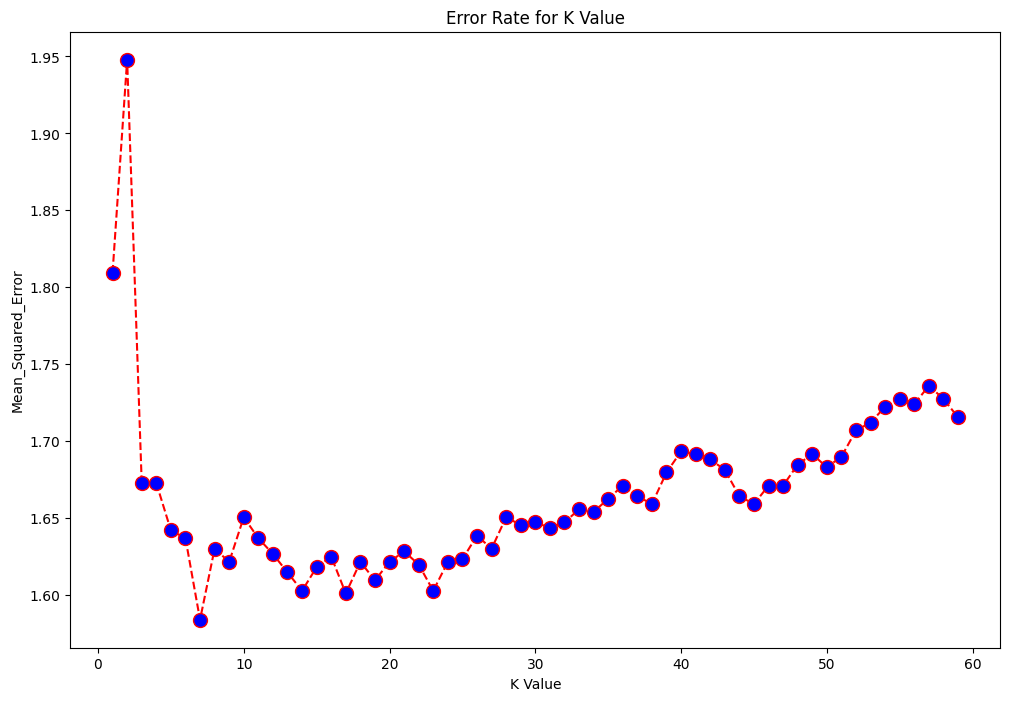

In [14]:
plt.figure(figsize=(12,8))
plt.plot(range(1,60), error, color='red', linestyle='dashed', marker='o',
        markerfacecolor='blue', markersize=10)
plt.title('Error Rate for K Value')
plt.xlabel('K Value')
plt.ylabel('Mean_Squared_Error')

In [15]:
minErr = min(error)
kth = error.index(minErr) + 1
print(kth)

7


In [16]:
KNN = KNeighborsClassifier(n_neighbors=kth)
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [17]:
y_pred = KNN.predict(X_test)

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.84      0.75      0.79      2006
           1       0.78      0.86      0.82      2006

    accuracy                           0.81      4012
   macro avg       0.81      0.81      0.80      4012
weighted avg       0.81      0.81      0.80      4012



In [19]:
print(confusion_matrix(y_test, y_pred))

[[1507  499]
 [ 282 1724]]
